# Our first machine learning model: Logistic Regression

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

from sklearn.metrics import f1_score

# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [2]:
# Load the titanic data set into a pandas dataframe.
df = pd.read_csv('data/titanic.csv')

## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [3]:
# Identify which columns have null values. 
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [4]:
# Check to see if our data has any duplicate rows.
df.duplicated().sum()

0

# Use sns.pariplot to visualize.
* Set the hue='survived'.

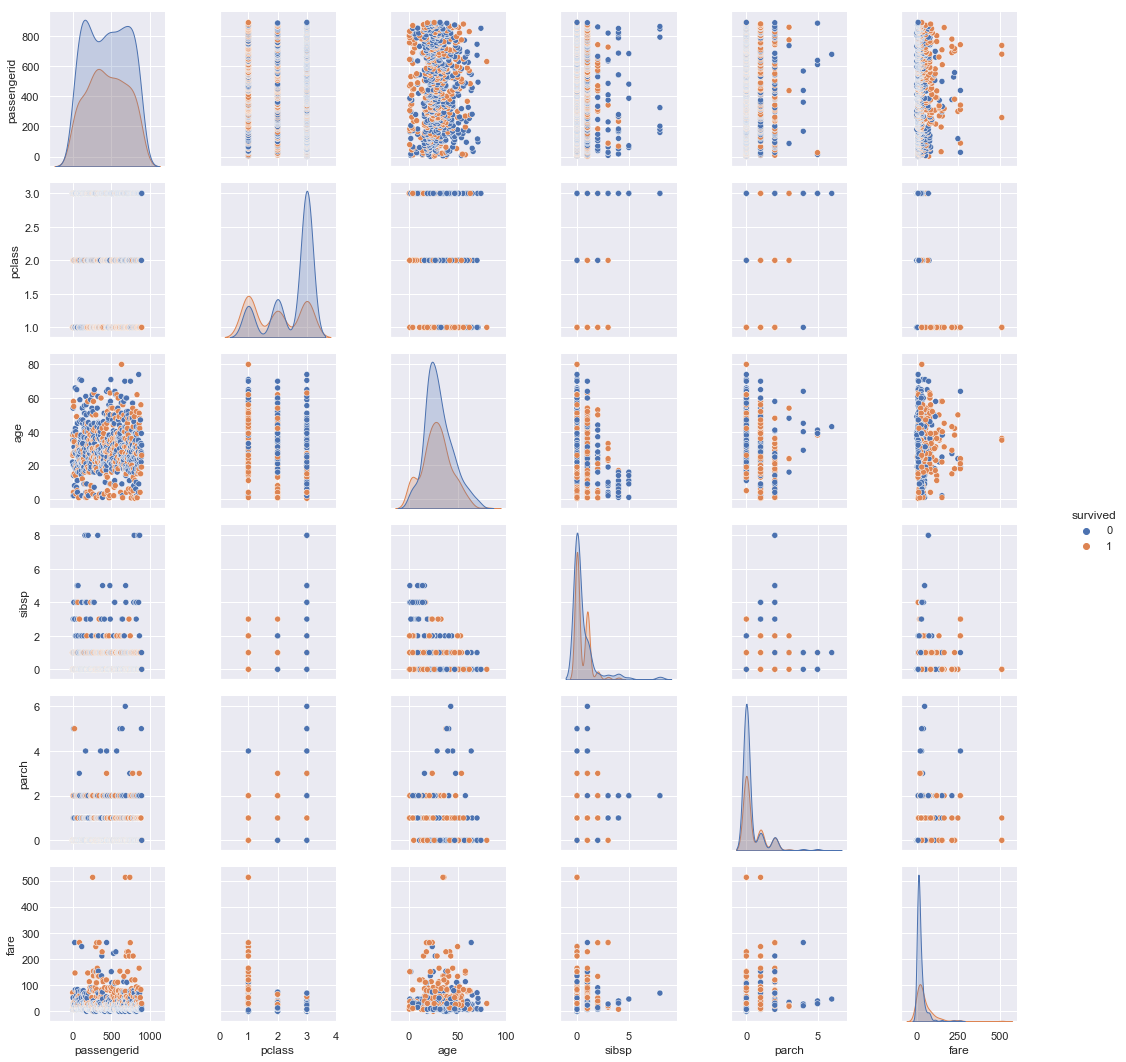

In [5]:
# Use sns.pariplot to visualize.
sns.pairplot(df, hue="survived")

# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [5]:
# Convert the sex column into a continuous variable by using pd.get_dummies
df = pd.get_dummies(df, columns = ['sex'], drop_first=True)
df

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [7]:
# Select our features
selected_features = ["fare", "sex_male"]

# Set X to be the features we are going to use.
X = df[selected_features]

# Set y to be our target variable. 
y = df["survived"]

# Split our data into the testing and training groups. 

In [8]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

# Print the length and width of our testing data.
print(X_train.shape, X_test.shape)

(712, 2) (179, 2)


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [9]:
# Initalize our model
model = LogisticRegression()

# Train our model using our training data.
model.fit(X_train, y_train)


C:\Users\jeffz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [10]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = model.predict(X_test)

In [11]:
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# Calculate our accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test, y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

Accuracy Score: 0.826816
Precision Score: 0.738462
Recall Score: 0.774194
F1 Score 0.755906


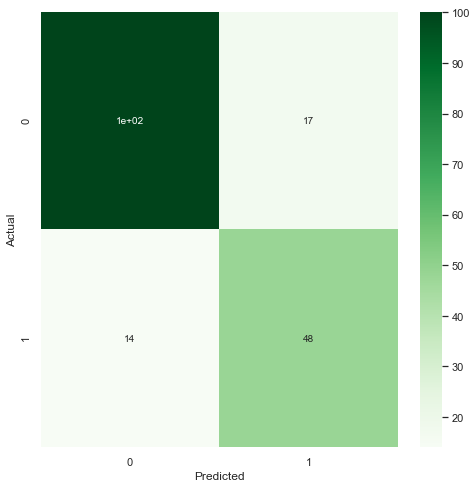

In [12]:
# 1. Plot a confusion matrix of your predicted results. 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual');




In [13]:
# How many True Positives and True Negatives did your model get?
print(cm[0][0],'True Negatives\n', cm[1][1],'True Positives')

100 True Negatives
 48 True Positives


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

Accuracy Score: 0.837989
Precision Score: 0.761905
Recall Score: 0.761905
F1 Score 0.768000
102 True Negatives
 48 True Positives
Model 2 is more accurate


C:\Users\jeffz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


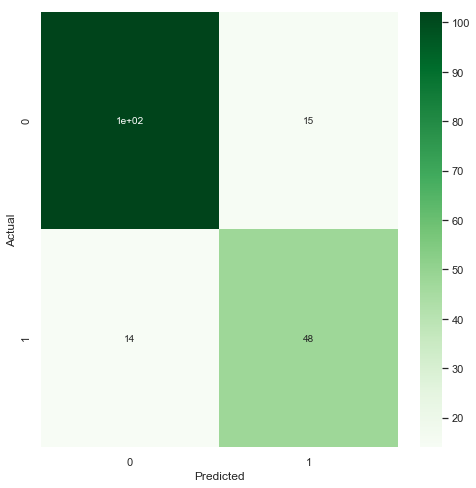

In [16]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on pclass and embarked of your DataFrame.
df = pd.get_dummies(df, columns = ["sex", "pclass","embarked"], drop_first=True)

# Update your `selected_features` to include the new pclass and embarked features. 
selected_features = ["fare", "sex_male","pclass_2","pclass_3","embarked_Q","embarked_S","sibsp","parch"]

# Define your X and y variables
X = df[selected_features]
y = df["survived"]

# Split our data into testing and training.
# !!! Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

# Initalize our model_2
model_2 = LogisticRegression()

# Fit / Train our model using our training data.
model_2.fit(X_train,y_train)

# Make new predicitions using our testing data. 
y_pred = model_2.predict(X_test)

# Calculate our accuracy
accuracy_2 = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision_2 = precision_score(y_test, y_pred)

# Calculate our recall score
recall_2 = precision_score(y_test,y_pred)

# Calculate your f1-score
f1_2 = f1_score(y_test, y_pred) 

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)

# Plot your confusion matrix.
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual');
print(cm[0][0],'True Negatives\n', cm[1][1],'True Positives')
print("Model 2 is more accurate")

# EXTRA CREDIT
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

Accuracy Score: 0.832402
Precision Score: 0.758065
Recall Score: 0.758065
F1 Score 0.758065
102 True Negatives
 47 True Positives


C:\Users\jeffz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


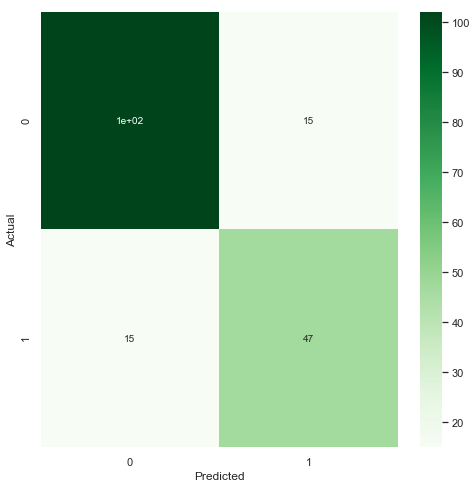

In [15]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.
df = pd.get_dummies(df, columns=["sex","pclass","embarked"], drop_first=True)

# Fill null age values with mean age.
df["age"].fillna(df["age"].mean(), inplace=True)

# Create new traveled_alone feature
select_condition = df["sibsp"] == 0
select_condition2 = df["parch"] == 0
df["traveled_alone"] = np.where(select_condition & select_condition2, 1 , 0)
df.drop(columns=['sibsp', 'parch'])

# Update your `selected_features` to include the new traveled alone and age
selected_features = ["traveled_alone", "fare", "sex_male","pclass_2","pclass_3","embarked_Q","embarked_S","age"]

# Define your X and y variables
X = df[selected_features]
y = df["survived"]

# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.
model_3.fit(X_train,y_train)

# Make new predicitions using our testing data. 
y_pred = model_3.predict(X_test)

# Calculate our accuracy
accuracy_3 = accuracy_score(y_test,y_pred)

# Calculate our precision score
precision_3 = precision_score(y_test,y_pred)

# Calculate our recall score
recall_3 = recall_score(y_test,y_pred)

# Calculate your f1-score
f1_3 = f1_score(y_test,y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(cm[0][0],'True Negatives\n', cm[1][1],'True Positives')